In [56]:
import pandas as pd

In [2]:
# 여대생 몸무게
data = [48, 54, 47, 50, 53, 43, 45, 43, 44, 47, 58, 46, 46, 63, 49, 50, 48, 43, 46, 45, 50, 53, 51, 58, 52, 53, 47, 49, 45, 42, 51, 49, 58, 54, 45, 53, 50, 69, 44, 50, 58, 64, 40 ,57, 51, 69, 58, 47, 62, 47, 40, 60, 48, 47, 53, 47 ,52, 61, 55, 55, 48, 48, 46, 52, 45, 38, 62, 47, 55, 50, 46, 47, 55, 48, 50, 50, 54, 55, 48, 50]
ser = pd.Series(data=data)
ser

0     48
1     54
2     47
3     50
4     53
      ..
75    50
76    54
77    55
78    48
79    50
Length: 80, dtype: int64

In [22]:
# 도수분포표
bins = pd.interval_range(start=35, end=70, freq=5) # 범위 지정
out = pd.cut(x=ser, bins=bins)
# 도수
table = out.value_counts(sort=False)
table

(35, 40]     3
(40, 45]    11
(45, 50]    33
(50, 55]    19
(55, 60]     7
(60, 65]     5
(65, 70]     2
dtype: int64

In [32]:
# 계급
s1 = pd.Series(data=bins)
# 계급값 -> 중앙값인데 .mid로 할 수 있지만 왼쪽값이 이상이라...
s2 = pd.Series([s1.iloc[i].left+3 for i in range(7)])
# 도수
s3 = table.reset_index(drop=True)
# 상대도수 -> 다 더해서 1
s4 = s3 / len(data)
# 누적도수 -> 마지막에 총 데이터 갯수여야 함
s5_list = []
result = 0
for i in range(7):
    result += s3.iloc[i]
    s5_list.append(result)
s5 = pd.Series(s5_list)

df = pd.concat([s1, s2, s3, s4, s5], ignore_index=True, axis=1)
df.columns = ['계급(초과~이하)', '계급값', '도수', '상대도수', '누적도수']
df

,계급(이상~미만),계급값,도수,상대도수,누적도수
0,"(35, 40]",38,3,0.0375,3
1,"(40, 45]",43,11,0.1375,14
2,"(45, 50]",48,33,0.4125,47
3,"(50, 55]",53,19,0.2375,66
4,"(55, 60]",58,7,0.0875,73
5,"(60, 65]",63,5,0.0625,78
6,"(65, 70]",68,2,0.0250,80


<AxesSubplot:ylabel='Frequency'>

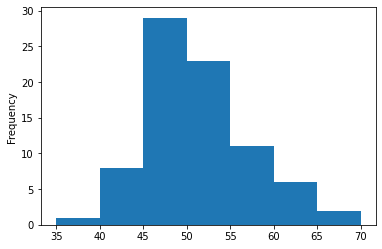

In [26]:
# 히스토그램
ser.plot.hist(bins=7, range=[35, 70])

In [34]:
# 평균값
df_avg = pd.DataFrame({'계급값' : [30, 50, 70, 90, 110, 130], '도수' : [5, 10, 15, 40, 20, 10]})
df_avg['상대도수'] = df_avg['도수'] / df_avg['도수'].sum()
df_avg['계급값 x 상대도수'] = df_avg['계급값'] * df_avg['상대도수']
df_avg

,계급값,도수,상대도수,계급값 x 상대도수
0,30,5,0.05,1.5
1,50,10,0.10,5.0
2,70,15,0.15,10.5
3,90,40,0.40,36.0
4,110,20,0.20,22.0
5,130,10,0.10,13.0


In [35]:
# 평균값
df_avg['계급값 x 상대도수'].sum()

88.0

In [54]:
# 표준편차
# 1. 평균을 계산
df2 = pd.DataFrame({'데이터' : [6, 4, 6, 6, 6, 3, 7, 2, 2, 8]})
df2_avg = df2.mean()
# 2. 편차 계산
df2['편차'] = df2 - df2_avg
# 3. 편차의 제곱과 그 평균(=분산) 계산
df2['편차의 제곱'] = df2['편차'] ** 2
df2_var = df2['편차의 제곱'].mean()
# 4. 표준편차
df2_std = df2_var ** (1/2)
df2

,데이터,편차,편차의 제곱
0,6,1.0,1.0
1,4,-1.0,1.0
2,6,1.0,1.0
3,6,1.0,1.0
4,6,1.0,1.0
5,3,-2.0,4.0
6,7,2.0,4.0
7,2,-3.0,9.0
8,2,-3.0,9.0
9,8,3.0,9.0


In [55]:
# 분산, 표준편차
# 근데 이거 numpy로 간단하게 가능!
df2_var, df2_std

(4.0, 2.0)